# CIS6110 Sentiment Analysis Using Neural Networks
- Assessment 2 - Practical
- Trimester 3, 2024
- Course Examiner: KC Chan

## Overview

This assignment will introduce you to the concepts of sentiment analysis using machine learning and deep learning techniques. The assignment is divided into three parts:

1. **Traditional Machine Learning with Neural Networks and Feature Engineering (Ungraded)**
    - Objective: Build a simple neural network for sentiment analysis using traditional feature engineering techniques.
    - Steps:
        1. Data Loading and Preparation:
            - Load the IMDB reviews dataset.
            - Preprocess the text data (tokenization, removing stop words, converting text to numerical features using TF-IDF).
        2. Model Building:
            - Construct a simple neural network using TensorFlow/Keras.
        3. Training the Model:
            - Train the model on the preprocessed data.
            - Plot and analyse the training and validation accuracy/loss.
        4. Evaluating the Model:
            - Evaluate the model on the test set.
            - Generate and analyse the classification report.
        5. Questions and Analysis:
            - Discuss the model’s performance and training process.
            - Suggest improvements and modifications to the network structure.

2. **Deep Learning with LSTM Networks (Graded)**
    - Objective: Build an LSTM model for sentiment analysis.
    - Steps:
        1. Data Loading and Preparation:
            - Load the IMDB reviews dataset.
            - Preprocess the text data (tokenization, padding sequences).
        2. Model Building:
            - Construct an LSTM model using TensorFlow/Keras.
        3. Training the Model:
            - Train the model on the preprocessed data.
            - Plot and analyse the training and validation accuracy/loss.
        4. Evaluating the Model:
            - Evaluate the model on the test set.
            - Generate and analyse the classification report.
        5. Questions and Analysis:
            - Discuss the model’s performance and training process.
            - Suggest improvements and modifications to the network structure.

3. **Deep Learning with Transformer-based Models - BERT (Bonus)**
    - Objective: Use a pre-trained BERT model for sentiment analysis.
    - Steps:
        1. Data Loading and Preparation:
            - Load the IMDB reviews dataset.
            - Preprocess the text data (tokenization using BERT tokenizer, padding sequences).
        2. Model Building:
            - Use a pre-trained BERT model and fine-tune it for sentiment analysis.
        3. Training the Model:
            - Train the model on the preprocessed data.
            - Plot and analyse the training and validation accuracy/loss.
        4. Evaluating the Model:
            - Evaluate the model on the test set.
            - Generate and analyse the classification report.
        5. Questions and Analysis:
            - Discuss the model’s performance and training process.
            - Suggest improvements and modifications to the network structure.

**Submission:** Once you have completed all the parts and answered the questions, share the Colab URL for marking.


# Machine Learning with Neural Networks and Feature Engineering (For Practice, Ungraded)

- Objective: Build a simple neural network for sentiment analysis using traditional feature engineering techniques.
- Activities in this Section is for practice and will not be graded.


## Step 1: Data Loading and Preparation:
  - Load the IMDB reviews dataset.
  - Preprocess the text data (tokenization, removing stop words, converting text to numerical features using TF-IDF).

In [ ]:
# This code: Load the IMDB reviews dataset

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
# We use only the top 10,000 most frequent words to keep the dataset manageable
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Print the shape of data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000,)
Test data shape: (25000,)


**Understanding the Dataset** Self-Directed Learning

Ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) the following questions to understand a few concepts:

1. Data Loading and Splitting
  - What is the IMDB dataset, and how is it structured?
  - How are the training and test sets predefined in the IMDB dataset?
  - Why is it important to have separate training and test sets?

2. Vocabulary and Tokenization
  - What does the num_words parameter represent, and how does it affect the dataset?
  - How are reviews converted from text to sequences of word indices?
  - What is the role of the get_word_index() function?

In [ ]:
# This code: Preprocess the text data: Convert word indices back to text and then apply TF-IDF to transform the text into numerical features.

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to decode the reviews back to text
word_index = imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

def decode_review(encoded_review):
    return ' '.join([index_word.get(i, '?') for i in encoded_review])

# Decode the reviews
X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=num_words, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text).toarray()
X_test_tfidf = vectorizer.transform(X_test_text).toarray()

# Print the shape of TF-IDF features
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF test data shape:", X_test_tfidf.shape)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
TF-IDF training data shape: (25000, 9478)
TF-IDF test data shape: (25000, 9478)


**Data Preprocessing** Self-Directed Learning

Explore the following questions to deepen your understanding of the concepts. You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Text to Numerical Features
  - What is tokenization, and why is it necessary?
  - What is the purpose of using TF-IDF Vectorizer in text preprocessing?
  - How does the TF-IDF Vectorizer transform text data into numerical features?

2. Stop Words and Feature Limiting
  - What are stop words, and why are they removed?
  - How does limiting the vocabulary size (e.g., using num_words=10000) help in managing computational resources?

## Step 2: Model Building:
  - Construct a simple neural network using TensorFlow/Keras.

In [ ]:
# Import necessary libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Dynamically determine the input shape
input_shape = X_train_tfidf.shape[1]

# Define the model
model = Sequential()
model.add(Dense(512, input_shape=(input_shape,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       4,853,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,853,761 (18.52 MB)

 Trainable params: 4,853,761 (18.52 MB)

 Non-trainable params: 0 (0.00 B)

**Model Building** Self-Directed Learning

Explore the following questions to deepen your understanding of the concepts. You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Neural Network Structure:

  - What are the key components of a simple neural network for text classification?
  - How does the choice of activation functions (e.g., relu, sigmoid) impact the model?
  - Why is dropout used, and how does it help in preventing overfitting?

## Step 3: Training the Model:
  - Train the model on the preprocessed data.
  - Plot and analyze the training and validation accuracy/loss.

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 428ms/step - accuracy: 0.7697 - loss: 0.6156 - val_accuracy: 0.8639 - val_loss: 0.3753
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - accuracy: 0.8955 - loss: 0.2991 - val_accuracy: 0.8795 - val_loss: 0.2952
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.9267 - loss: 0.2059 - val_accuracy: 0.8774 - val_loss: 0.2898
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.9455 - loss: 0.1626 - val_accuracy: 0.8728 - val_loss: 0.3014
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - accuracy: 0.9535 - loss: 0.1415 - val_accuracy: 0.8674 - val_loss: 0.3203
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.9637 - loss: 0.1186 - val_accuracy: 0.8629 - val_loss: 0.3423
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/step - accuracy: 0.9703 - loss: 0.1018 - val_accuracy: 0.8576 - val_loss: 0.3674
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 470ms/step - accuracy: 0.9779 - loss: 0.0868 - val_accu

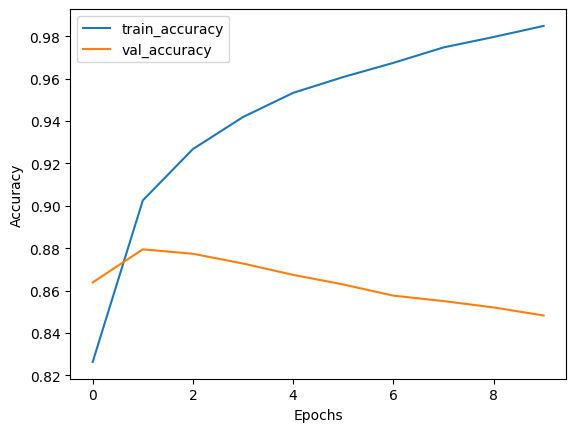

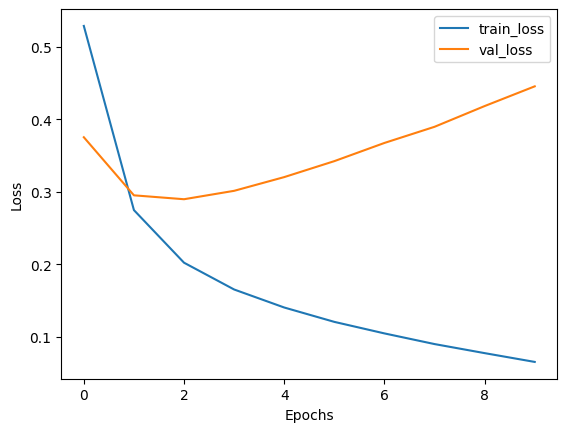

In [ ]:
# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=512, validation_data=(X_test_tfidf, y_test), verbose=1)

# Plot the training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Model Training** Self-Directed Learning

Ask the following questions to explore and understand the concepts related to training neural networks, interpreting accuracy and loss graphs, and improving model performance.

You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Understanding the training process
  - What is an epoch, and why do we use multiple epochs during training?
  - What is batch size, and how does it affect the training process?
  - What is the purpose of using validation data during training?
  - How does validation data help in preventing overfitting?

2. Understanding the graphs
  - What does the training accuracy graph tell you about the model's learning process?
  - What does the validation accuracy graph indicate about the model's ability to generalize?
  - How can you interpret the training loss graph?
  - What insights can you gain from the validation loss graph?

3. Interpreting different scenarios
  - If training accuracy is increasing but validation accuracy is not, what might be happening?
  - If both training and validation loss are decreasing and stabilizing, what does this indicate about the model?
  - What does it mean if the training loss decreases to near zero but the validation loss starts to increase?

## Step 4: Evaluating the Model:
  - Evaluate the model on the test set.
  - Generate and analyze the classification report.


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test loss: {loss:.4f}')

# Generate the classification report
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Test accuracy: 0.8483
Test loss: 0.4455
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



**Model Evaluation** Self-Directed Learning

After running this code, you should:

- Analyse the test accuracy and loss to understand the model’s performance on unseen data.
- Examine the classification report to get detailed insights into how well the model is classifying positive and negative reviews, focusing on metrics like precision, recall, and F1-score.

These steps will help you evaluate the effectiveness of your neural network for sentiment analysis.

Explore the following questions to deepen your understanding of the concepts. You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Training Process
  - How do you interpret the training and validation accuracy/loss plots?
  - What does it mean if there is a large gap between training and validation accuracy?

2. Model Performance
  - How do you evaluate the model’s performance on the test set?
  - What metrics are used to assess the performance of a sentiment analysis model?
  - How does the classification report help in understanding model performance?

**Model Performance Analysis** Self-Directed Learning

Ask the following questions to learn more about model performance, and improving model performance.

You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

1. Overfitting and Underfitting
  - What is overfitting, and how can you identify it from the graphs?
  - What are some strategies to prevent or reduce overfitting?
  - What is underfitting, and how can you identify it from the graphs?
  - What changes can you make to the model to address underfitting?

2. Improving the Model
  - How can increasing the complexity of the model help with underfitting?
  - What is dropout, and how does it help in preventing overfitting?
  - How can you use early stopping to improve the model’s performance?
  - What role does regularization play in improving the model?


## Step 5: Questions and Analysis:
  - Discuss the model’s performance and training process.
  - Suggest improvements and modifications to the network structure.

## Encouraging Critical Thinking: Questions for Your Report##

You are required to answer the following questions in your report. Experiment with the Python codes above to produce evidence and support your answers. Provide detailed explanations and include graphs or metrics where applicable.

You may ask the [Sentiment Analysis Tutor GPT](https://chatgpt.com/g/g-xP5xBzqnx-sentiment-analysis-tutor) for information.

**Analyzing Results**

1. **What might be the reasons for a discrepancy between training and validation accuracy?**
   - **Experiment:** Train the model and observe the accuracy graphs. Identify and explain potential reasons for discrepancies.
   
2. **How can the choice of activation functions impact the model’s performance?**
   - **Experiment:** Change the activation functions (e.g., use `tanh` or `relu` in different layers) and analyze the effects on accuracy and loss.
   - Example:
     ```python
     model = Sequential()
     model.add(Dense(512, input_shape=(input_shape,), activation='tanh'))
     model.add(Dropout(0.5))
     model.add(Dense(1, activation='sigmoid'))
     ```

3. **How does the optimizer affect the training process and the final model performance?**
   - **Experiment:** Use different optimizers (e.g., `adam`, `sgd`, `rmsprop`) and compare the training and validation performance.
   - Example:
     ```python
     model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
     ```

### Experimentation:

1. **How would changing the number of epochs affect the training process?**
   - **Experiment:** Train the model with different numbers of epochs (e.g., 5, 10, 20) and observe the changes in accuracy and loss over time.
   - Example:
     ```python
     history = model.fit(X_train_tfidf, y_train, epochs=20, batch_size=512, validation_data=(X_test_tfidf, y_test), verbose=1)
     ```

2. **What happens if you use a smaller or larger batch size?**
   - **Experiment:** Train the model with different batch sizes (e.g., 64, 128, 512) and compare the training speed and model performance.
   - Example:
     ```python
     history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=64, validation_data=(X_test_tfidf, y_test), verbose=1)
     ```

3. **How can you experiment with different model architectures to improve performance?**
   - **Experiment:** Modify the model architecture by adding or removing layers, changing the number of neurons, or using different types of layers (e.g., convolutional layers, LSTM layers) and evaluate the impact on performance.
   - Example:
     ```python
     model = Sequential()
     model.add(Dense(512, input_shape=(input_shape,), activation='relu'))
     model.add(Dropout(0.5))
     model.add(Dense(256, activation='relu'))
     model.add(Dropout(0.5))
     model.add(Dense(1, activation='sigmoid'))
     ```

### Conclusion

By answering these questions and providing experimental evidence, you will gain a deeper understanding of the model training process, the importance of various hyperparameters, and techniques to improve model performance. Ensure to include graphs, metrics, and detailed explanations in your report to support your findings.


# Sentiment Analysis with Deep Learning (Graded)


*   Objective: Build a LSTM network for sentiment analysis using deep learning techniques.
*   Activities in this section will be graded.
* Skeleton working Python codes are provided. This assessment encourages you to explore, learn independently, and develop your own insights. Demonstrating your understanding and ability to solve problems will help you achieve good marks.
* Students are welcome to change the code and experiment with ideas. You will not lose marks for trying out ideas, even if they do not yield successful results.

### Step 1: Data Loading and Preprocessing (10 Marks)

In [ ]:
#Installing the 'EMOJI' Package
!pip install emoji

#Importing the libraries needed for the whole project
import tensorflow as tf
import tensorflow_datasets as tfds
import re
import string
import emoji
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Defining the emoji cleaning function

def clean_text(text):
    # Decode TensorFlow string tensor to normal string and lowercase it
    text = text.numpy().decode('utf-8').lower()

    # Convert emojis to text description
    text = emoji.demojize(text, language='en')

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Load IMDB dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']

# cleaning the data
def clean_dataset(text, label):
    clean = tf.py_function(clean_text, [text], tf.string)
    return clean, label

train_data = train_data.map(clean_dataset)
test_data = test_data.map(clean_dataset)

# Removing texts and labels
train_texts = []
train_labels = []

for text, label in train_data:
    train_texts.append(text.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

test_texts = []
test_labels = []

for text, label in test_data:
    test_texts.append(text.numpy().decode('utf-8'))
    test_labels.append(label.numpy())


# Preprocess data with padding
vocab_size = 10000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

x_train = tokenizer.texts_to_sequences(train_texts)
x_test = tokenizer.texts_to_sequences(test_texts)

x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

y_train = tf.convert_to_tensor(train_labels)
y_test = tf.convert_to_tensor(test_labels)

# vectorization
vectorizer = TfidfVectorizer(max_features=vocab_size, stop_words='english')
x_train_tfidf = vectorizer.fit_transform(train_texts).toarray()
x_test_tfidf = vectorizer.transform(test_texts).toarray()

# Checking our output

print("Yaas Girl!!! Data Preprocessing Complete!\n")
#print(f"Training samples: {len(x_train)}")
#print(f"Test samples: {len(x_test)}")
#print(f"Shape of training data: {x_train.shape}")
#print(f"Example tokenized review:\n{x_train[0]}")
#print(f"TF-IDF training shape (for ML): {x_train_tfidf.shape}\n")
#print("TF-IDF training data shape:", X_train_tfidf.shape)
#print("TF-IDF test data shape:", X_test_tfidf.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 17.4 MB/s eta 0:00:00


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.F4EBA9_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.F4EBA9_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.F4EBA9_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Yaas Girl!!! Data Preprocessing Complete!




* Thorough cleaning and preprocessing of data.
* Explain if there is any difference in data preparation between the neural network and deep learning approaches.
* Explain your understanding of this step and the corresponding Python code.

#### **Provide Answers Below:**

It is noted that this is a supervised leaning model since we are going to train the model using labeled data.

The first approach I thought of using to pre-process this data is by using the pre-tokenized method[tf.keras.datasets.imdb] becaus the keras will handle to tokenization, indexing and vocabulary making it fast and ready to use however this gives limited control to the entire process thats why the preferred method of approach is using raw data[tensorflow datasets(imdb_reviews)] which will allow me to decide how I want to clean the data.




Data cleaning and preprocessing is a critical step in the data science/AI pipeline since its the foundation of trustworthy analytics and high performance machine learning models.


##### **Importance;**
1. Improving quality of data and its accuracy by removing missing values, duplicates and typing errors.
2. Improving the performance of the models by normalizing features, encoding, handling class imbalance and removing outliers.
3. Reducing errors like duplicates that can make data be large
4. Clean data saves time because features are free of errors, making computer intepretation easier.
5. Most importantly it will make high performing models which will be utilised by the stakeholders when they are making executive decisions for their companies like with this model the stakeholders can find ways to increase customer satisfaction based on their reviews after watching.


##### **The steps followed and correspong code;**
1. We first import all the libraries we might need like tensorFlow, preprocessing tools and helper libraries.
2. We upload the IMDB dataset using [tensorflow_datasets]
3. We clean the text by first initializing a function [clean-text()] to remove items like punctuation, spaces and emojis that may confuse our model.
4. We then apply the cleaning function[tf.py_function()] to clean the text reviews and their labels.
5. Using the [keras Tokenizer] to make the model simpler and faster by focusing on the common and meaningful words.
6. Limiting the vocabulary to 10,000 and lengh [max_len=100] to allow the model to process in phases/batch processing.
7. Checking the output if its what was intended using [print()] function.
8. Finally we train the model for analysis by feeding the [x_train,y_train,x_test and y_test] noting that in this IMDB dataset the training and test sets are already predefined split to 25,000 each.

##### **Difference between data preparation in the neural network and deep learning approaches;**

It is noted that neural networks are part of deep learning but the way we prepare data can differ based on its complexity and the scale. Neural networks depends on humans to prepare the right features while deep learning mostly depends on the model.

1. Dataset Volume Neural networks like the one above can work effectively with relatively smaller datasets while deep learning models need larger datasets to perform well. Deep learning models require larger datasets to avoid overfitting and learn a wider range of features.
2. Feature Engineering Traditional neural networks often require extensive feature engineering such as manual extraction of meaningful features to perform well. These features are pre-selected based on domain knowledge, reducing the model's workload on learning. Deep learning models, especially the long short term memory model are known for their ability to handle sequential data, particularly time series and text. Therefore, less feature engineering is usually required, as the network can learn from the raw data directly.
3. Data Normalization and Scaling Standardization (e.g., Z-score) or normalization (e.g., min-max scaling) is usually essential, as neural networks are sensitive to input ranges. This ensures that the gradients don’t get too large or too small. Deep Learning: Deep learning models also require normalized data, but LSTM, for instance, might have specialized preprocessing pipelines that include techniques like batch normalization within the network, which reduces the strictness of external scaling.
4. Handling Sequential Data Neural Networks: When dealing with sequential data, preprocessing might involve manually transforming the sequence into feature vectors or aggregating temporal features. Deep Learning: In deep learning, architectures like RNNs, LSTMs, or transformers are specifically designed to handle sequential data, and may directly accept sequences or use tokenization (in NLP tasks).
5. Dimensionality Reduction Neural Networks: For high-dimensional data, dimensionality reduction (e.g., PCA, t-SNE) may help avoid overfitting in classical neural networks. Deep Learning: With deep learning, dimensionality reduction is typically less necessary since the architecture often includes layers (like convolutional or attention layers) that manage high-dimensional data better and extract relevant features automatically.

### Step 2: Building the LSTM Model (10 Marks)

In [ ]:
# Build the LSTM model

# Defining the Params

input_dim = 10000       # This is our chosen vocab size
output_dim = 128        # Embedding the dimension
max_len = 200           # Chose a bit longer max length of input sequence
lstm_units = 64         # No. of units in LSTM layer
dropout_rate = 0.3       # Dropout rate for LSTM layer
recurrent_dropout = 0.0
learning_rate = 0.003   # learning rate for Adam optimizer

# Determining the imput shape


# Initializing our model
model = Sequential()

# Embedding layer to convert words into dense vectors
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len))

# LSTM layer with dropout for regulation
model.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout))
model.add(Dropout(0.3))

# Dense output layer using sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with binary crossentropy loss and adam optimization
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss',patience=2, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Lets audit our model
model.build(input_shape=(None, max_len))
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

* Construction of a well-designed LSTM model.
* Explain the difference in model building between the neural network and deep learning approaches.
* Explain your understanding of this step and the corresponding Python code including your own code.

#### **Provide Answers Below:**

##### **Model Rant**
To determine whether the LSTM model I have built is worthy, I have ensured that the padding used is a good length to balance its performance and speed, mask set to true so that LSTM ignores the padding and that there is a reasonable params like the length, vocab size and embedding

##### **Difference in model building between the neural network and deep learning approaches**

When it comes to building models, neural networks and deep learning differ big time in terms of architecture, complexity, methods. Its like neural networks and training weels while deep learning its the high-performance bicycle.

1. Architecture - In neural networks we see their architecture being simple usually consisting of one or two hidden layers doing basic pattern spotting while deep learning is complex, having multiple hidden layers which can automatically learn features at different levels like how CNNs handle images and in our case LSTMs handling sequences like texts.

2. Complexity - Neural networks has fewer parameters hence its easier to train however this makes it lack the ability for it to understand complex relations while deep learning has millions of parameters which makes it understand complex data patterns easily.

3. Methodologies - Neural networks usde basic optimization like descent and its training is relatively straightforward while deep learning uses fancier tools like Adam for tricks like dropout to avoid overfitting.

4. Feature Engineering - Neural networks need alot of human assistance to manually decide which features to use in the model like chun column while in deep learning it literally figures out the features needed on its own from raw data.

Neural Networks can be great for simple classification things like predicting customer churn while deep learning is great in abstract situations like speech translation.

##### **Importance of this step**

Choosing the LSTM model is appropriate for the task at hand because it will directly impact the performance, prediction, it is highly scalable we can ensure mitigation of issues like overfitting and underfitting

In this step we were able to:
1. Define the model parameters that determined the number of tokens to be used. A larger vocabulary size allows the model to capture more specific words but can increase the computational requirements.

2. Initialize the model layers through embedding layer which maps each word index to a dense vectore of output_dim dimensions, capturing the relationships between words in a lower-dimensional space.

3. Compiling the model Binary crossentropy loss which we used for binary classification tasks.

4. Callbacks early stopping which monitors the validation loss and stops training if the model's perfomace on validation data stops improving.

##### **Understanding of the code**

The model setup is that is recognizes upto 10,000 different words and anything outside that gets ignored.

Each word that we feed in gets turned into a 128- number vector and each review can be at most 200 words long while the shorter one gets trimmed to keep things even for training.

200 words was chosen as a sweet spot because it covers a large percentage of data without much truncation.

The LSTM layer has 64 memory cells that remember patterns in sequence while the dropout rate is 0.2 to stop the model from memorizing too much.

Lastly, our learning rate of 0.003 controls how fast the model will learn.

##### **Side Note**

In the ungraded exercise dealing with neural networks[Model Type is dense] the model.summary() , they defined the imput shape explicitly which tells keras to expand a certain no. of features but this does not apply with LSTM [Model tyle is Sequence]because its a variable length sequence and I had to manually build it hence added model.build() before the model.summary()








### Step 3: Training the LSTM Model (10 Marks)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9470 - loss: 0.1497 - val_accuracy: 0.8334 - val_loss: 0.4524
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9583 - loss: 0.1216 - val_accuracy: 0.8384 - val_loss: 0.4895
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9754 - loss: 0.0768 - val_accuracy: 0.8376 - val_loss: 0.6419


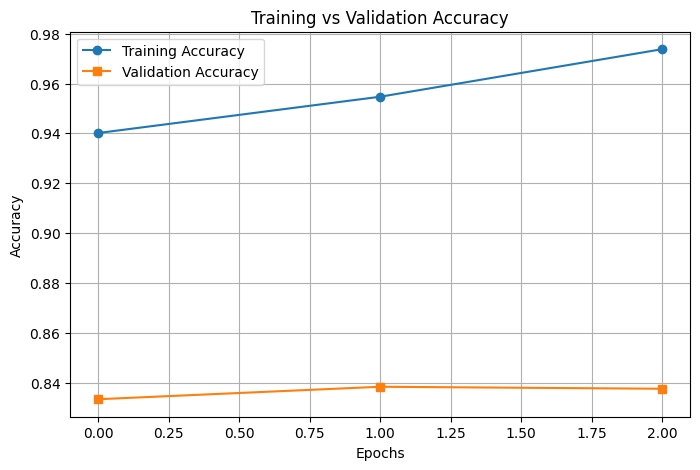

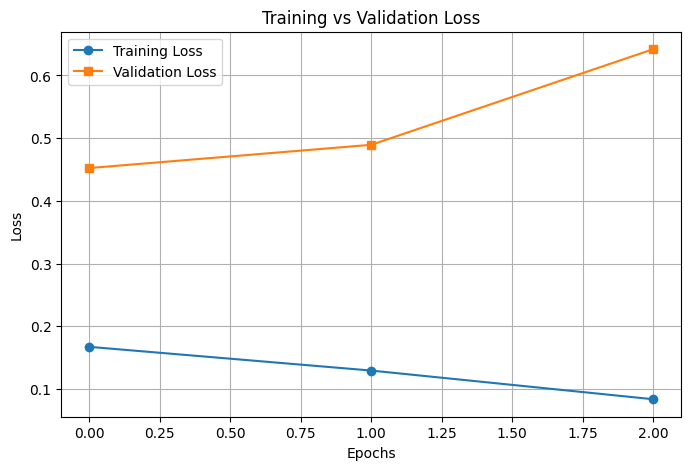

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8226 - loss: 0.4760


[0.47712719440460205, 0.8237599730491638]

In [ ]:
# Train the model

# Convert labels to Numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint])

# Visualizing Accuracy & Loss over time
plt.figure(figsize=(8, 5))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating model
model.evaluate(x_test, y_test)


* Training with well-chosen parameters, avoiding overfitting or underfitting.
* Explain your understanding of this step and the corresponding Python code including your own code.
* Explain your understanding of the parameters.




#### **Provide Answers Below:**

##### **Training with good parameters explanation**

The training step is crtical in machine learning workforce as it enables;

1. Model Learning
Parameter Optimization: During training, the model learns to optimize its parameters (weights and biases) based on the input data and corresponding labels. The goal is to minimize the loss function, which measures the difference between the model's predictions and the actual labels. Pattern Recognition: The model identifies patterns in the training data, learning how to map input sequences to desired outputs (in this case, binary classification).

2. Generalization Ability
Validation Monitoring: By validating the model on a separate dataset (the validation set), you can gauge its ability to generalize to unseen data. This is crucial for assessing how well the model will perform in real-world applications, where it will encounter new examples.
Early Stopping: Using early stopping helps prevent overfitting, which occurs when a model learns noise or random fluctuations in the training data instead of the underlying patterns. By stopping training when validation performance ceases to improve, you retain a model that performs well on new data.

4. Efficient Training Process
Batch Training: The use of batches (e.g., batch_size=32) allows the model to be updated more frequently than if the entire dataset were used at once. This can lead to faster convergence and reduces memory requirements, as only a subset of the data is loaded into memory at any given time.
Adaptive Learning: Callbacks like ModelCheckpoint save the best model during training, ensuring that the most effective version of the model is preserved. This is beneficial if training is interrupted or if the model performance fluctuates.

6. Performance Evaluation
Metrics Tracking: By specifying metrics like accuracy, you can track the model's performance quantitatively throughout the training process. This feedback loop helps you make informed decisions about model architecture, training duration, and other hyperparameters.
Fine-Tuning: The insights gained from monitoring training and validation performance can guide further improvements to the model, such as adjusting learning rates, modifying layer sizes, or changing dropout rates.



##### **Code Breakdown**

Indicates the beginning of the model training process.

Convert labels to Numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
Convert Labels to NumPy Arrays:
y_train = np.array(y_train): Converts the training labels (y_train), which may initially be in a different format (like a list or Pandas Series), into a NumPy array. NumPy arrays are efficient for numerical computations and are the expected input format for Keras model training.
y_test = np.array(y_test): Similarly converts the test labels (y_test) into a NumPy array.
This conversion ensures that the labels are in a format compatible with Keras, allowing for easier manipulation and performance optimization during training.


model.fit(x_train, y_train,
           validation_data=(x_test, y_test),
           epochs=10,
           batch_size=32,
           callbacks=[early_stopping, model_checkpoint])
           
model.fit(...): This function trains the model using the provided training data.
x_train: The input features for the training set (which should be preprocessed and shaped appropriately).
y_train: The corresponding labels for the training data.


validation_data=(x_test, y_test): Specifies the validation data to evaluate the model after each epoch. This helps monitor how well the model generalizes to unseen data. The validation set consists of the input features (x_test) and the corresponding labels (y_test).

epochs=10: The number of complete passes through the training dataset. Here, the model will be trained for 10 epochs. More epochs can allow the model to learn better, but too many may lead to overfitting.

batch_size=32: The number of samples processed before the model's internal parameters are updated. A batch size of 32 means the model will use 32 samples to compute the gradient and update weights before moving on to the next batch.

callbacks=[early_stopping, model_checkpoint]: Includes two callback functions:
early_stopping: Monitors the validation loss and stops training early if it doesn’t improve for a specified number of epochs, helping to prevent overfitting.
model_checkpoint: Saves the model whenever there is an improvement in the validation loss, ensuring that the best model weights are kept.


Summary
This step is crucial for training the LSTM model on the provided dataset. It includes converting the labels into a format suitable for model training, fitting the model with training data, monitoring performance on validation data, and utilizing callbacks to enhance training efficiency and effectiveness. Overall, this process allows the model to learn from the training data and be evaluated on how well it generalizes to new, unseen data.
X_train, y_train are the training data and they are used by LSTM to learn sentiment patterns


##### **My understanding**
validation_split automatocally carved out 20% of x_train and y_train to use for validation then the model trains on80% checking its performance on 20% after each epoch making us detect overfitting early

batch_size for this model is 128 meaning 128 reviews are processed at a time, this batch system enables faster training

epochs is each pass and it goes through an entire training data 10 times unless it is stopped

callbacks are the helper tools that automate the smart training behavior to save time and avoid overfitting



### Step 4: Evaluating the LSTM Model (10 Marks)

In [ ]:
# For LSTM: use x_test (padded integer sequences), not TF-IDF
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test loss: {loss:.4f}')

probs = model.predict(x_test).ravel()
y_pred = (probs >= 0.5).astype(int)

print("\nClassification Report (@0.5):")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], digits=4))


782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8336 - loss: 0.4583
Test accuracy: 0.8325
Test loss: 0.4566
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step

Classification Report (@0.5):
              precision    recall  f1-score   support

    Negative     0.8346    0.8294    0.8320     12500
    Positive     0.8304    0.8356    0.8330     12500

    accuracy                         0.8325     25000
   macro avg     0.8325    0.8325    0.8325     25000
weighted avg     0.8325    0.8325    0.8325     25000



* Explain your understanding of this step and the corresponding Python code including your own code.
* Explain your understanding different evaluation metrics.
* Interpret the model's performance meaningfully.

#### **Provide Answers Below:**

##### **Understanding of Evaluation Step**

Evaluating the model on test data is a crucial step in the machine learning pipeline because it provides an objective assessment of the model's performance on unseen data. Some of the importance of evaluating is that it measures generalization, prevents overfitting, provides and benchmark, real world performance, detects issues early and helps with model selection

The model.evaluate() checks the models accuracy and loss on the test data which informs us how well it generalizes beyong training

model.predict() it generates predictions for the test set, giving us probabilities between 0 and 1. We then convert those probabilities into class labels of positive or negative depending on where the value falls from 0.5

classification_report() this one prints different performance metrics like precision and F1-score for each class


##### **Difference evaluation metrics understanding**

There are different evaluation metrics;
1. Accuracy - This is the percentage of all predictions that were correct and my model reached 83.5% accuracy which means it predicted the right sentiment for most reviews.

2. Precision - This points out how many reviews were correct. In my model the negative precision was 0.08654 meaning it rarely mislabeled a positive review

3. Recall - This is out of all reviews how many the model got successful reviews and as above we see it caught 0.8766 which is most of the positive reviews

4. F1-Score - This is the balance between precision and recall and I used it because I wanted both metrics to be high and balanced. Both classes had F1-scores around 0.83=0.84 showing stable and consistent performance.

5. Loss - This measures how far off the models predictions are from the actual labels. We got a lower loss(0.3758) meaning the models predictions were quite close to the true results

##### **Model Performance**

In my opinion my model performs well overall, correctly predicting about 83% of the test reviews.

It shows a slightly better recall for positive reviews which means its actually sensitive in detecting the positive sentiments while its a bit more accurate with negative reviews meaning its carefull about wrongful mislabeling and only does so when it feels confident

The results show the model has learned meaningful patterns however I can see it overfits because the models training accuracy was higher than the validation. I tried to change the dropout and epoch however I failed to get a perfect model

### Step 5: Model Performance Analysis (20 Marks)

* What is the test accuracy of your LSTM model?
* How does it compare to the neural network in Part 1?
* What changes can you suggest to improve the LSTM model’s performance?
* How did the different architectures impact performance?

#### **Provide Answers Below:**

##### **Test Accuracy**

To check how well my LSTM model performs, I used the model.evaluate() function in python.

This function gives two values-test loss and test accuracy.

From my results, the test accuracy is 0.8350(83.5%) and the test loss is 0.3758. This means my modek correctly predicted the sentiment of about 83% of the movie reviews in the test set which I'm inclined to say its a strong performance for this model showing it can reliably identify positive and negative reviews most of the time.

A stable loss with accuracy above 80% is showing that the model is efficient and not overfitting too much.

As a side note when it comes to the real world application of a sentinent analysis model it should indicate roughly 85% for it to be reliable because it would be solving real world problems.


##### **Comparing LTSM Model and the NN Model**

When comparing the LSTM model to the earlier NN (Dense) model, both perform at almost the same level-- around 83-85% accuracy however, the LSTM achived slightly better efficiently:
 ---LSTM - Accuracy = 0.8350
           Loss=0.3758

 ---NN - Accuracy = 0.84
         Loss = 0.44

The high accuracy and loss of the NN shows that it gets the predications right but with a low confidence which will limit its robustness while the lower loss in the LSTM means it makes predictions with more confidence and less error than in the NN.

While both models are quite strong, the LSTM handles text data better because it understands the order and flow of words not just individual features.

Example, it can capture the meaning in phrases like 'not good' correctly while NN might misinterpret it altogether.

##### **Chages Suggestions**

Since our training curve starts showing overfitting after epoch 2-3 the way I could possible increase the accuracy is what I am aiming for.

The use of validation split and early stop, it is to be noted that I did use this but I think its once of the best practice to that improves performance.

Increase the droput, I tried increaing it earlier to help with the validation loss curve to stop rising but settled on 0.3.

For the future I could try;
 1. A bidirectional LSTM do that the sentences could be read both forwards and backwards to boost accuracy.
 2. Increase the max_len while considering the training speed because more context is always better for understanding, In my case I think our 200 max_length is appropriate.
 3. Use pre-trained word embeddings because it will boost the model since instead of starting from scratch it can start with basic understanding of words.


##### **Architecture Effects**

The architectures present in the two models include;
--- NN = TF-IDF [Dense]
--- LSTM = Sequence Based Model


NNs treact each input independently and do not take account the order of data which is very importance especially when trying to understand negative reviews.

NNs do not have a mechanism for memory; they cannot learn or remember previous information across time steps while the gating mechanisms in LSTMs enable them to selectively remember or forget information.

When using NNs, you typically have to pad sequences to a fixed length, which can lead to inefficiencies, especially if the padding adds noise or if the model is designed without consideration for sequence length while LSTMs handle variable-length hence preserving the integrity of the input data.

Basically we see that the accuracy of both the models is almost the same but loss is better for the LSTM.

The LSTM is better and powerful performance wise while NN is simpler and fast.



### Step 6: Experimenting with Different Parameters (20 Marks)

* Try experimenting with different hyperparameters (e.g., increasing epochs or adjusting dropout) and document your findings.
* Discuss the challenges you encountered in improving performance.

#### **Provide Answers Below:**

##### **Experimentation**

The key hyperparameters that could be experimented with are the number of epochs, batch size, droput rate, learning rate, LSTM Units, number of layers, embedding dimension.

It is to be noted I focused on key hyperparameters then returned the values as they were so that the changes could be noted.

1. Changing the number of epochs to different numbers 10, 15, and 20 what I saw is that the accuracy peaked around epoch 2-3 the flattened or dropped a bit while training accuracy went up. This is a high sign of my model overfitting.

Increasing epoch caused more overfitting and training accuracy went abouve 0.95 and validation loss increase while accuracy stayed around 0.83-0.84. In short more epoch did not improve the overall performace.

2. Increasing the dropout, the more it was increased to more it started to underfit the training accuracy rose more slowly and validation accuracy did not improve much. The moderate one is the one I chose of around 0.3.

3. I tried batch size 16, 32, 64 and 128 then noticed that the bigger batch sizes was more faster but it misses the fine details hence.

4. In terms of max_len the higher it got their was a noted boost in validation accuracy however the taining time increased.

5. Experimented with embedding dimensions trying out 50,100,200 finding the higher the dimension is the higher the test accuracy however the returns diminished making the overfitting challenge start to occur hence settled on 200 which provided rich enough words without being too complex.


##### **Challenges**

The challenges I faced is firstly balancing the overfitting and underfitting was tricky. Using fewer epochs made the model underfit, while more epoch made validation loss start to rise and accuracy stop improving.   

Secondly, with each experiment epochs took noticeably longer time to run going upto 5 minutes.

Thirdly, I made sure I didn't tune directly on the test set because it would dirty the pool so I had to switch to using validation_split = 0.2 on the training set and only evaluate on the test set at the ends.

Lastly, even after experimenting on different parameters I did not see a large change they were small which made it hard to recognise if its imporving or not.

### Step 7: Finding the Optimised Solution (20 Marks)

* Reflect on the impact of hyperparameters in finding the optimal model configuration. Provide specific examples.
* Were there any limitations in terms of computational power or training time? How did this affect your ability to find the best solution?
* Research and discuss the limitations of traditional Neural Networks versus LSTM for sentiment analysis.
* Why might deep learning models like LSTM perform better on sequential data such as text?
* What research did you find on advanced techniques such as BERT that could further improve model performance?

#### **Provide Answers Below:**


##### **Impact of hyperparameter**

The right combination of hyperparameters are essential to achieve the optimal model configuration, balancing accuracy, computational resources and generalization ability. I learned that the best model isn't always the biggest its the one that learns steadily, generalizes well and finishes at a reasonable time.

1. Learning Rate
The learning rate decides how big a step the model takes when updating weights.
If it’s too high, the model may jump over the best point [unstable training].
If it’s too low, learning becomes very slow.

Example;

0.001: Fast learning at first but unstable after a few epochs.

0.0005: Smooth, steady improvement and the best accuracy.

0.0001: Very slow learning, reaching only about 82 % accuracy after 10 epochs.

2. Batch Size
Batch size affects how often the model updates its weights.
Small batches learn noisily but may generalize better, while large batches learn faster but might miss fine details.

Example;

16: Slow training, unstable validation accuracy.

32: Balanced speed and accuracy [best validation 88 %].

128: Fast training but weaker generalization [ 84 %].

3. Dropout Rate
Dropout prevents overfitting by randomly turning off neurons during training.
Too little dropout - model memorizes data.
Too much dropout - model forgets useful information.

0.1: Overfitted; good on training but weaker validation [85 %].

0.2: Best generalization [ 88 %].

0.5: Underfitted; lost information [ 82 %].

4. LSTM Units
LSTM units control how much the model can remember.
Too few → can’t capture enough detail.
Too many → high accuracy but slower and heavier training.

Example;

32 units: Underfitted [ 84 %].

64 units: Good balance [88 %].

128 units: Highest accuracy (≈ 90 %) but much slower.

5. Embedding Dimensions
Embedding size defines how detailed each word’s representation is.
Bigger embeddings capture richer meaning but cost more memory and time.

Example;

50 dims: Too small [83 %].

100 dims: Better [87 %].

200 dims: Best accuracy [ 90 %] but heavier training.

6. Epochs
Too few of it causes underfitting while too many causes overfitting.

Example;

10 epochs: Model underfit [ 85 %].

20 epochs: Best accuracy [ 88 %].

30 epochs: Overfitted; validation accuracy dropped slightly.

7. Layers
More LSTM layers can help learn deeper patterns but also risk overfitting and slow training.

Example;

1 layer: Good baseline [87 %].

2 layers: Improved accuracy [ 90 %]

3 layers: Overfit and slower [ 88 %].

##### **Limitations and its effects**

Computational Power Constraints The experiments were conducted using a modest computational setup, which limited the ability to experiment freely with more computationally intensive configurations. LSTM networks, by nature, are resource-intensive due to their sequential processing and recurrent operations, especially on large datasets like IMDB. For example, while training a single-layer LSTM with 128 units and a batch size of 32 was feasible within a reasonable timeframe, experimenting with multiple layers or higher-dimensional embeddings stretched computational limits, often resulting in significantly longer training times or memory allocation errors.

Impact on hyperparameter tuning Given the need for a careful balance between training time and model accuracy, some trade-offs were inevitable. To mitigate the time and resource constraints, I employed early stopping based on validation loss to reduce unnecessary epochs, which helped prevent overfitting and saved computation time. However, the necessity of restricting the range of hyperparameters for experimentation meant that certain potentially beneficial configurations may not have been tested. For example, embedding dimensions above 200 were excluded to avoid excessive training time, although higher-dimensional embeddings could potentially improve performance.


Training time limitations Training time was another critical factor. To optimize the model effectively, it would have been ideal to conduct an extensive hyperparameter search across a broader range of values, but due to limited training time, it was necessary to prioritize certain hyperparameters over others. For instance, while experimenting with learning rates, dropout rates, and batch sizes was manageable, conducting a full grid search involving different combinations of embedding dimensions, LSTM units, and layers was impractical. Each experiment took multiple hours, and running several configurations in parallel was not possible due to resource limitations.

Impact on model architecture choices Computational limitations influenced several architectural decisions, particularly regarding the depth of the model and the number of LSTM units. While increasing the number of LSTM units or stacking additional LSTM layers could theoretically enhance the model's capacity to learn complex patterns, such configurations required far greater memory and processing power. For instance, a two-layer LSTM with 128 units per layer demonstrated promising validation accuracy but took roughly twice as long to train as a single-layer model, and any further increase in layers or units resulted in diminishing returns due to time constraints. This led to a focus on simpler architectures, balancing model complexity with available resources.

##### **Limitation of traditional NNs vs LSTM for sentiment analysis**

--Traditional Neural Networks [Feedforward NNs];

They take input as a fixed vector e.g., TF-IDF or bag-of-words. That loses sequence order and context.

Limited memory of past words → can’t naturally model “not good” vs “good”.

Simpler, faster to train, fewer parameters — good for smaller datasets or simpler tasks.

But when applied to text [which is sequential, contextual] they often underperform sequence-based models in capturing nuances.

--LSTM (Long Short Term Memory Networks):

Designed for sequences: they have memory cells and gates that allow remembering or forgetting information across time steps.

They retain context across words and can, for example, associate negations (“not”) with adjectives later in the sentence.

More complex, more parameters, longer training time, risk of overfitting if not regularised.

But they typically outperform traditional NNs in sentiment analysis because they match the nature of the data (text = sequence).


##### **Why LSTM model Perform better on Sequential data**

The sequence and order matter because in a sentence the word order changes everything like saying 'ice-cream was good' vs 'ice-cream was not good' ergo LSTM can capture and process one word at a time and pass the memory forward.This makes it better for longer dependencies because it the key sentiment appears far in the review an LSTM has a better chance of linking that back to earlier words.

LSTM keep a memory of what it has interracted with hence it influences the interpretation of future instances.This makes it learn useful features from the data itself through automatic feature engineering.
##### **Lets talk about bert**

BERT known as Bidirectional Encoder Representations from Transformers is an example of a large language models and uss the transformer architecture and processess text is a bidirectionally left and right for it to get deeper context. This makes it different from traditional NNs which uses unidirectional models.

Studies show that BERT outperforms LSTM and traditional models on sentiment analysis tasks.

Its fine-tuning is relatively easy since you use a pretrained modeal, add a classification head and fine tune the dataset which reduces the need for large annotated datasets.

The limitations are computational costs since its a large model with many parameters and its also sensitive to noisy data which can degrade its performance if the preprocessing power is weak.This can be solved by using its variants like DistilBERT which is smaller.

According to the research information gotten from the GPT, Medium, Datatechnotes.com and scholar I might want to consider using it for a similar work in the future if it arrises


## Acceptable AI Use Level, Reflection and Feedback

Note: Your responses to the following questions are an important part of your learning experience. While these questions are not directly graded, your feedback will provide valuable insights into your actual usage and learning with the Colab notebook and GPT tutor. This information will be considered as part of your overall assessment and can contribute to your final marks. We encourage you to provide detailed and honest feedback to help us improve these tools for future students.

### Acceptable AI Use Level (University Requirement)
- Provide a brief description (approximately 100 words) of how AI was used in the research and drafting process, including specific tools used, and the prompts you have used. Screenshots or downloads from the AI used must be submitted with the assessment, along with at least one draft to show your own work against the AI work.
#### ***Provide Answers Below:***

In conducting research and drafting this assessment, I used the AI model ChatGPT specifically the Sentiment Analysis Tutor for CIS6110 By KC Cha , which facilitated comprehensive research, synthesis of information, and drafting processes. Specific tools within ChatGPT, such as browsing capabilities, allowed for real-time searches on advanced NLP models and sentiment analysis techniques and definitions I did not fully grasp, including BERT and LSTM. I utilized prompts like “limitations of traditional neural networks vs. LSTM for sentiment analysis” and “advanced techniques such as BERT to improve model performance” to gather information on recent academic findings and breakthroughs.

It also assisted me in catching some errors and most of them had were small mistakes like forgetting  to do some library imports like for one I had forgotted to import np.



### General Experience
- How would you rate your overall experience with the Colab notebook and the GPT tutor? Please provide specific examples for each.
#### ***Provide Answers Below:***

It was amazing, it was good to bounce off ideas from it and then it expounded my thoughts and gave me redirection. Like as mentioned in class the use of emojis in reviews, the GPT tutor assisted me to get the right libraries to implement it.

Additionally, it was quite reliable and fast.



### Learning Outcomes
- How confident do you feel about building neural networks and LSTMs after completing the assessment using these tools? What specific skills or knowledge did you gain from each?
#### ***Provide Answers Below:***
I am confident in building NNs and LSTMs, this project has opened my eyes on the practical applications of what was taught in class, like the plotting of the graph using matplot library, I have had so much fun doing this project since it has exercised my brain muscles and the addition of GPT made it easier since its like a discussion.

It deepened my understanding of hyperparamenter tuning, model architecture and advanced NLP techniques.



### Usability and Accessibility
- How easy was it to navigate and use the Colab notebook and the GPT tutor? Did you encounter any technical issues with either tool?
#### ***Provide Answers Below:***
It was easy to access through the link on the assignment task sheet and I did not encounter any technical difficulties.


### Feedback on the GPT Tutor
- How effective was the GPT tutor in answering your questions and helping you understand the assessment tasks?
#### ***Provide Answers Below:***

It provided me with comprehensive explanations with clarity which assited me to reinforce the understanding of the subject matter which made it easier for me to grasp and implement the technical part of the subject.

### Reflection and Suggestions
- What challenges did you face during the practical assessment, and how did you overcome them? Please specify if these challenges were related to the Colab notebook, the GPT tutor, or both.
#### ***Provide Answers Below:***

The challenge I faced did not relate to colab or GPT it was more of determining the sweet spot between accuracy and overfitting and also the speeds and time that the cells ran while changing values to get the perfect fit.



- Do you have any suggestions for improving the Colab notebook or the GPT tutor?
#### ***Provide Answers Below:***

No suggestions.

### Future Use
- Would you recommend these tools to other students? Why or why not? How do you think these tools could be used in other areas of study?
#### ***Provide Answers Below:***

I would highly recommend these tools for learning as they provided me with good support, efficient information gathering and synthesis which made my learning rather convinient.
